# Titanic Survival Data Analysis

## **Introduction**
This analysis explores survival patterns in the Titanic dataset. We aim to understand how different factors such as **gender, passenger class, age, and family size** influenced survival rates. The following visualizations will help uncover key insights.

---


## **Step 1: Load the Data**
We first import the dataset and display the first five rows.

In [27]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\Hp\Downloads\titanic.csv")

# Display first few rows
from IPython.display import display
display(df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Step 2: Understanding Data Structure**
- There are 418 passengers in this dataset.
- The **"Age"** and **"Cabin"** columns have missing values.
- The **"Survived"** column (0 = No, 1 = Yes) is our target variable.


In [28]:
df.shape  # This gives (number_of_rows, number_of_columns)


(418, 12)

In [3]:
# Check dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## **Step 3: Handling Missing Values**
- **Age** has missing values, so we will fill them with the median age.
- **Cabin** has many missing values, so we will drop it.


In [29]:
# Count missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Step 4: Data Summary**
This table provides an overview of the numerical columns:

- The **average passenger age** is approximately **30.27 years**.
- The **highest fare paid** was **$512.33**.
- The **survival rate** is approximately **36.37%** (since the mean of "Survived" is 0.363636, meaning about 36% of passengers survived).



In [31]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Titanic Data Analysis:


## **Understanding Survival Patterns Through Visualizations**
In this section, we explore **various factors that influenced survival rates** on the Titanic using data visualizations. The following charts will help us analyze:
- **Overall survival distribution**
- **Impact of passenger class on survival**
- **Effect of age on survival chances**
- **How family size influenced survival rates**

Each visualization is accompanied by a brief explanation of its key insights.

---




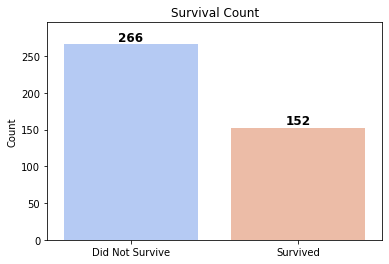

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of survivors with labeled bars
ax = sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count")

# Remove x-axis label
plt.xlabel("")  # This removes the default "Survived" label under the x-axis

plt.ylabel("Count")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])  # Custom labels

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",  
                (p.get_x() + p.get_width() / 2, p.get_height() + 5),  # Center and space text
                ha="center", fontsize=12, fontweight="bold", color="black")

plt.ylim(0, max(df["Survived"].value_counts()) + 30)  # Extend y-axis for spacing
plt.show()


## **Survival Count**
- **266 passengers did not survive**, while **152 passengers survived**.
- The survival rate is **approximately 36%**, meaning most passengers did not make it.
- This highlights the **severity of the Titanic disaster** and the **limited number of lifeboats**.
- The graph makes it clear that **survival was not evenly distributed**, and many people lost their lives.



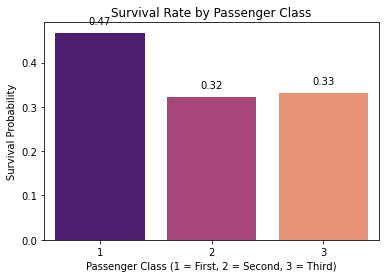

In [40]:
# Survival rate by passenger class with labeled bars
ax = sns.barplot(x="Pclass", y="Survived", data=df, palette="magma", ci=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Survival Probability")

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + 0.3, p.get_height() + 0.02))

plt.show()


## **Survival Rate by Passenger Class**
- **First-class passengers had the highest survival probability (47%).**
- **Second-class passengers had a survival probability of 32%.**
- **Third-class passengers had a survival probability of 33%, only slightly higher than second-class.**
- This confirms that **wealth and social status played a role in survival chances** on the Titanic.
- **First-class passengers had better access to lifeboats**, increasing their chances of survival.


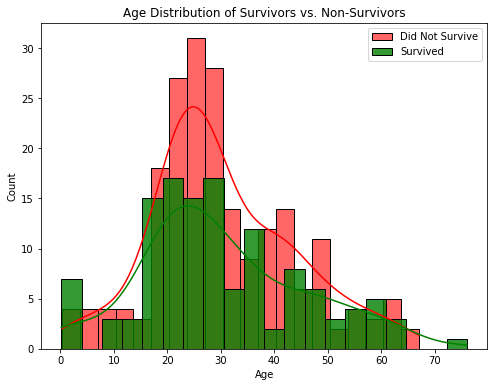

In [43]:
plt.figure(figsize=(8, 6)) 

# Plot non-survivors
sns.histplot(df[df["Survived"] == 0]["Age"], bins=20, kde=True, color="red", label="Did Not Survive", alpha=0.6)
# Plot survivors 
sns.histplot(df[df["Survived"] == 1]["Age"], bins=20, kde=True, color="green", label="Survived", alpha=0.8)


plt.legend(facecolor="white", loc="upper right")  
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()




## **Age Distribution of Survivors vs. Non-Survivors**
- **Children (0-10 years) had a higher survival rate**, likely due to the **"Women and children first"** policy.
- **Young adults (20-40 years) had the highest number of deaths**, as seen from the high concentration of red bars.
- **Elderly passengers (60+) had low survival rates**, indicating that older individuals were less likely to escape.
- The overall trend shows that **survival chances varied significantly by age**, reinforcing the idea that **younger passengers were prioritized for rescue**.


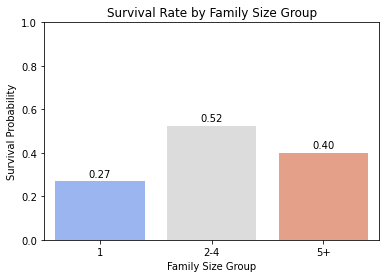

In [47]:
# Create FamilySize column
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # +1 includes the passenger themselves

# Group large family sizes into categories
df["FamilyGroup"] = df["FamilySize"].apply(lambda x: "1" if x == 1 else 
                                                    "2-4" if 2 <= x <= 4 else 
                                                    "5+")

# Plot the updated family survival rate
ax = sns.barplot(x="FamilyGroup", y="Survived", data=df, palette="coolwarm", ci=None)

plt.title("Survival Rate by Family Size Group")
plt.xlabel("Family Size Group")
plt.ylabel("Survival Probability")
plt.ylim(0, 1)  # Keep survival rates between 0-1 for better readability

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + 0.3, p.get_height() + 0.02))

plt.show()


## **Survival Rate by Family Size**
- **Small families (2-4 members) had the highest survival rate (~52%).**  
- **Single travelers had a lower survival rate (~27%).**  
- **Large families (5+ members) had the lowest survival rate (~40%).**  
- Having **some family helped**, but **larger families struggled to evacuate together**, reducing their chances of survival.  
- This trend suggests that **being alone was risky, but too many family members also reduced survival chances** due to logistical challenges.



# **Final Summary & Conclusion**
- **Most passengers did not survive** (~36% survival rate).
- **Women had a much higher survival rate than men** (supporting "Women and children first").
- **First-class passengers had the best survival rate**, while third-class had the worst.
- **Children had a higher chance of survival**, while adults (especially men) had lower survival rates.
- **Small families had better survival chances than solo travelers or large families.**

These insights confirm that **social status, gender, and family size played a key role in survival.**
